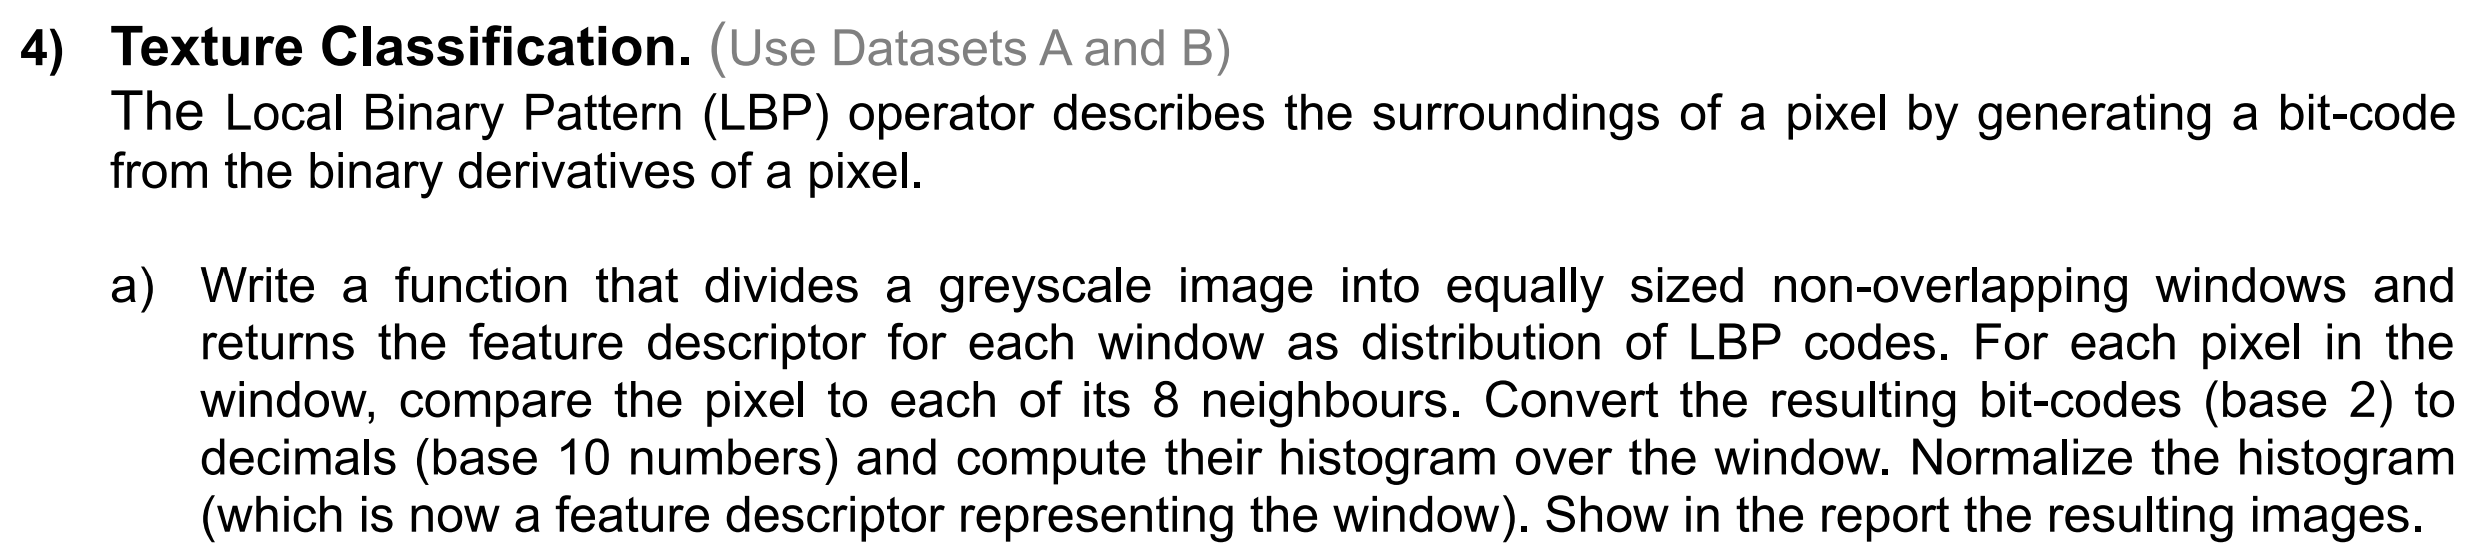

In [131]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [132]:
import cv2

# Load an RGB image
face1_image = cv2.imread("Dataset//DatasetA//face-3.jpg")
face2_image = cv2.imread("Dataset//DatasetA//face-2.jpg")
car1_image = cv2.imread("Dataset//DatasetA//car-1.jpg") 
car2_image = cv2.imread("Dataset//DatasetA//car-2.jpg") 

# Convert the RGB image to grayscale
face1_gray_image = cv2.cvtColor(face1_image, cv2.COLOR_BGR2GRAY)
face1_image = np.array(face1_gray_image)

face2_gray_image = cv2.cvtColor(face2_image, cv2.COLOR_BGR2GRAY)
face2_image = np.array(face2_gray_image)


car1_gray_image = cv2.cvtColor(car1_image, cv2.COLOR_BGR2GRAY)
car1_image = np.array(car1_gray_image)

car2_gray_image = cv2.cvtColor(car2_image, cv2.COLOR_BGR2GRAY)
car2_image = np.array(car2_gray_image)

# Save or display the grayscale image
# cv2.imwrite('grayscale_image.jpg', gray_image)
# cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [133]:
def LBP(image, window_size):
    concatinated_histograms = []
    output = np.zeros(image.shape)
    normalised_output = np.zeros(image.shape)
    for i in range(0, image.shape[0],window_size):
        for j in range(0,image.shape[1],window_size):
            
            #add padding to the window
            window = np.zeros((window_size+2, window_size+2))
            window[1:window.shape[0]-1, 1:window.shape[1]-1] = image[i:i + window_size, j:j + window_size]
            window_decimal_numbers = calculate_decimal_number(window)
            max_value = np.max(window_decimal_numbers)
            normalised_output [i:i + window_size, j:j + window_size] = (window_decimal_numbers/max_value)
            output [i:i + window_size, j:j + window_size] = window_decimal_numbers
            
            normalised_histogram = create_histogram(window_decimal_numbers)
            
            concatinated_histograms.append(normalised_histogram)
            

    plt.imshow(output, cmap='gray')
    plt.title("Not normalised")
    plt.show()
    return concatinated_histograms

In [134]:
def create_histogram(decimal_numbers):
    
    max_value = decimal_numbers.max()
    
    histogram = np.zeros((1,max_value+1))
    
    for i in range(decimal_numbers.shape[0]):
        for j in range(decimal_numbers.shape[1]):
            
            histogram[0,decimal_numbers[i,j]] += 1
    
#     print(np.max(histogram[0]))
#     print(histogram[0])
    normalised_histogram = histogram[0]/np.max(histogram[0])
#     print(normalised_histogram)
    plt.figure(figsize=(12, 4))
    plt.subplot(121)  # 1 row, 2 columns, plot 1
    plt.plot(histogram[0], color = 'gray')
    plt.subplot(122)
    plt.plot(normalised_histogram, color = 'green')
    plt.show()
    return normalised_histogram
    #Q1 is histogram frequency of color occurance here?
    #Q2 is normalised histogram on max frequency?

In [135]:
def calculate_decimal_number(window):
    binary_numbers = []
    for i in range(1, window.shape[0]-1):
        for j in range(1, window.shape[1]-1):
            binary_number = ""
            center = window[i,j]
            neighbours =  [window[i-1, j-1],window[i-1, j],window[i-1, j+1],
                           window[i, j-1],window[i, j+1],
                           window[i+1, j-1],window[i+1, j],window[i+1, j+1]]
            for neighbour in neighbours:
                if neighbour > center:
                    binary_number += "1"
                else:
                    binary_number += "0"
            binary_numbers.append(binary_number)
            
    decimal_numbers = [int(binary, 2) for binary in binary_numbers]
#     print("decimal numbers shape", len(decimal_numbers),window.shape[0], window.shape[1])
    np_array = np.array(decimal_numbers).reshape(window.shape[0]-2, window.shape[1]-2)
    return np_array
                

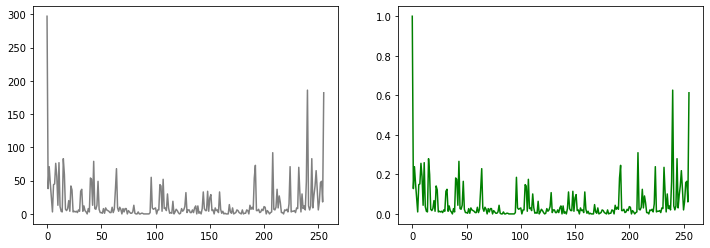

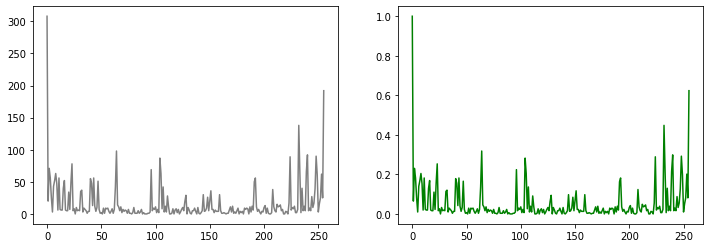

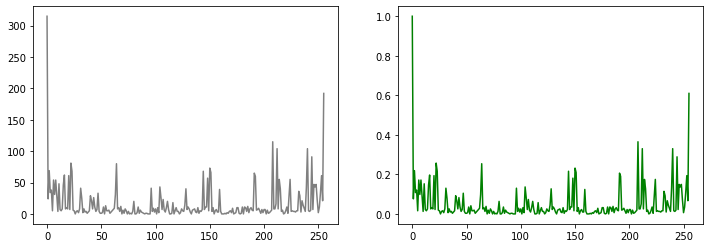

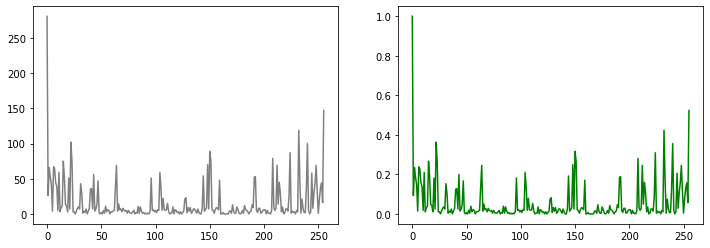

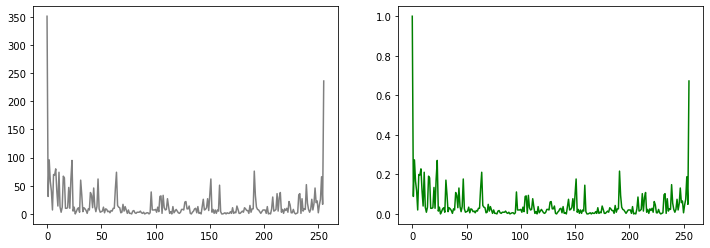

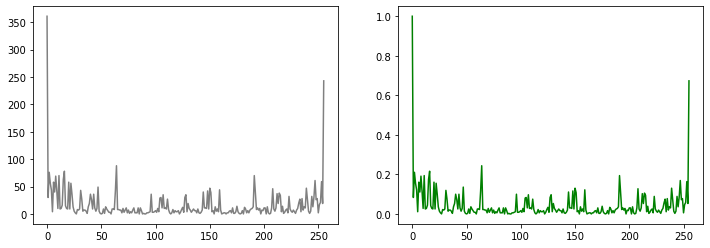

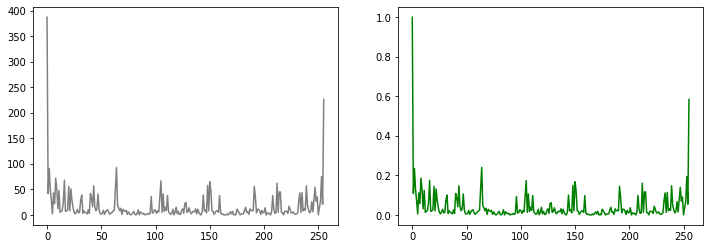

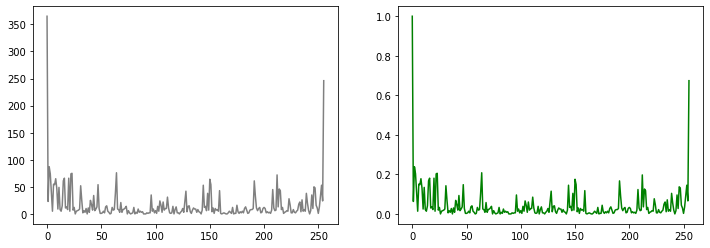

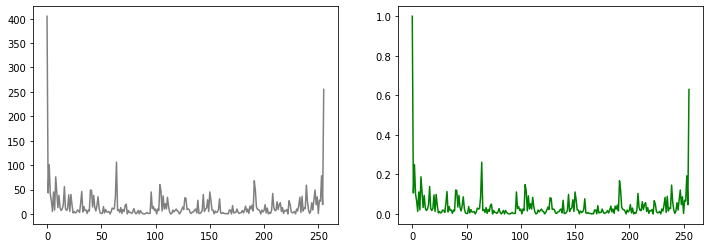

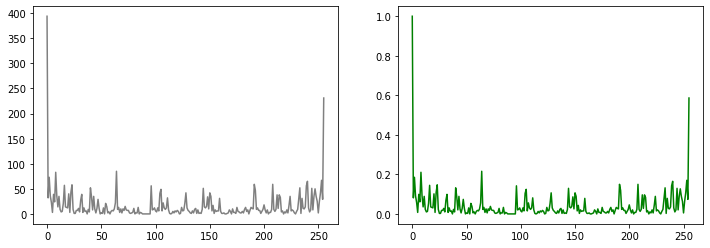

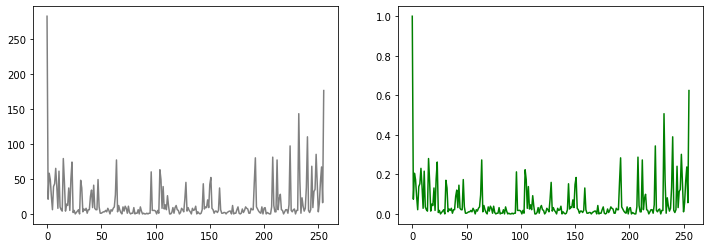

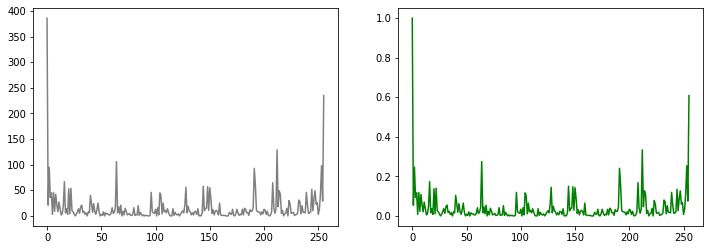

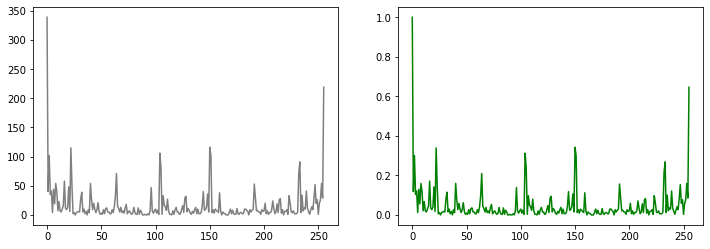

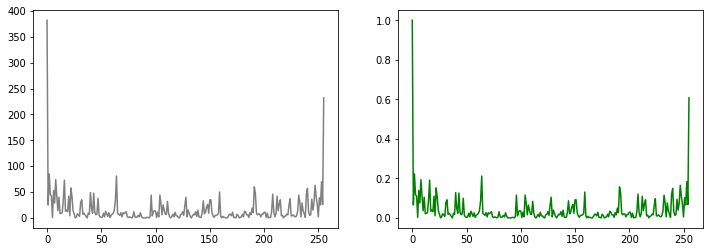

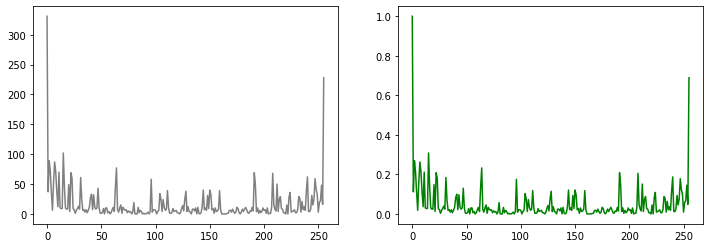

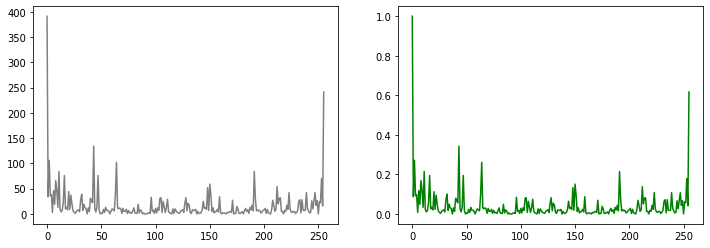

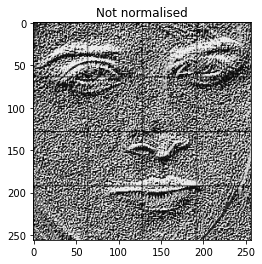

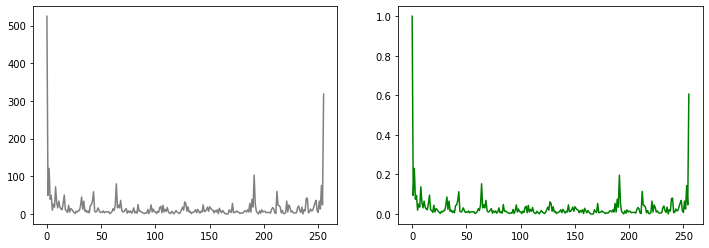

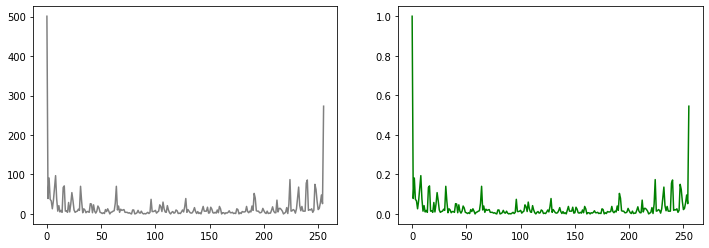

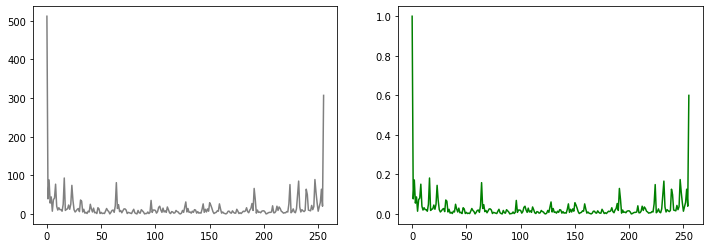

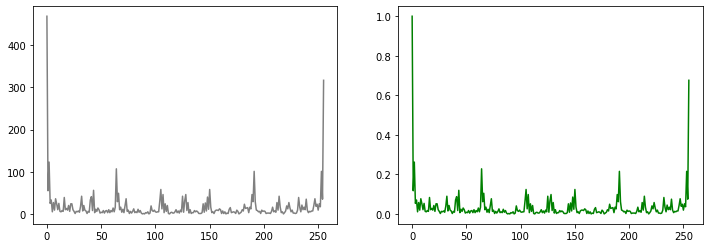

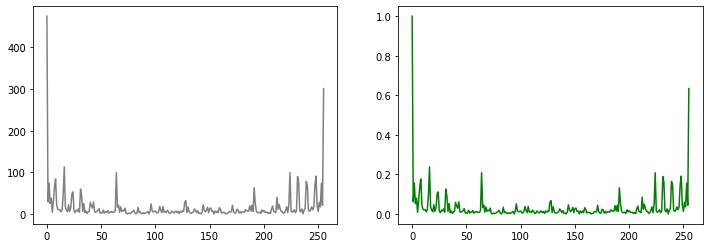

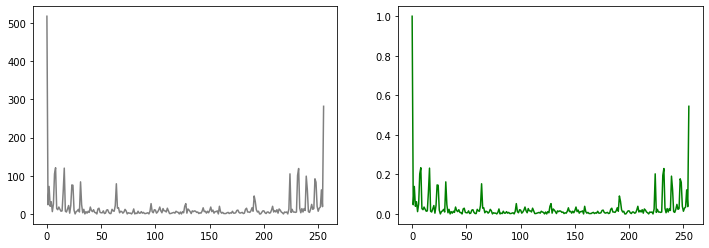

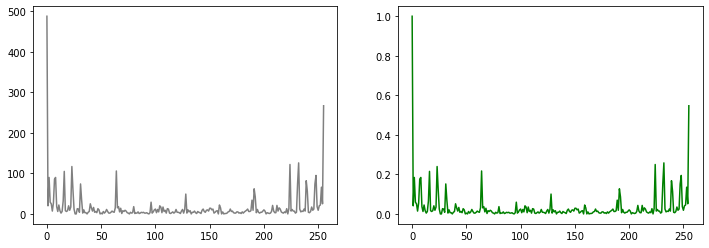

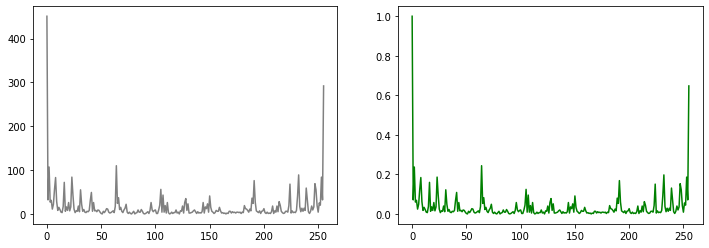

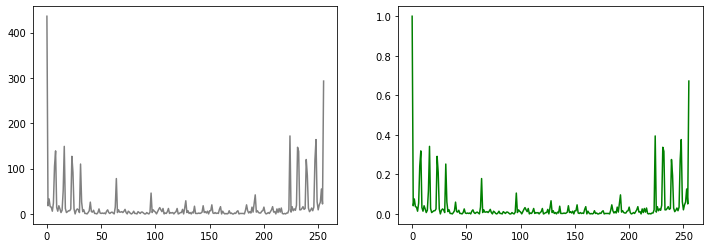

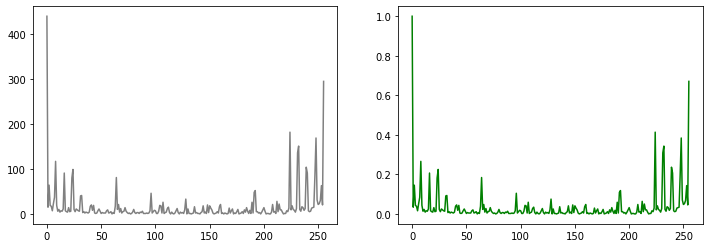

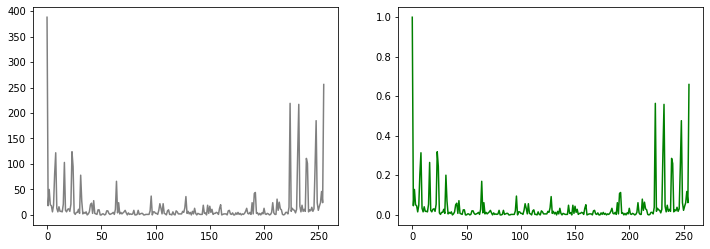

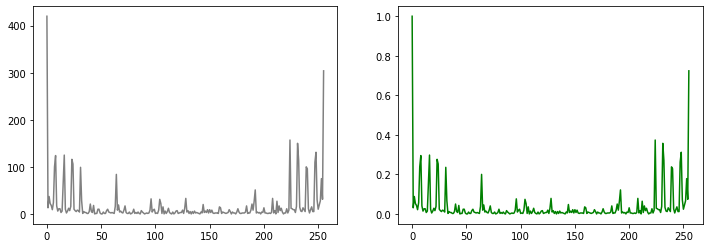

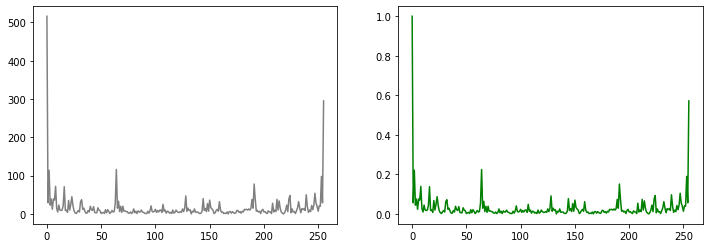

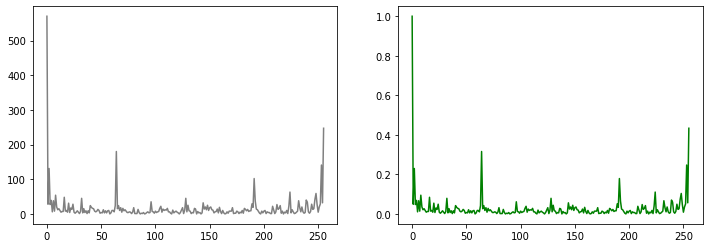

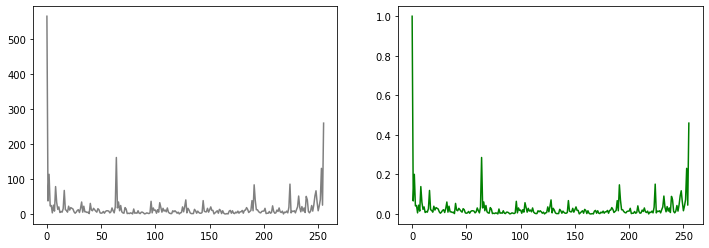

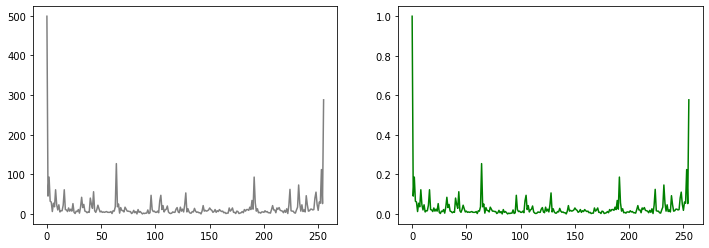

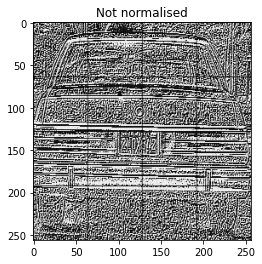

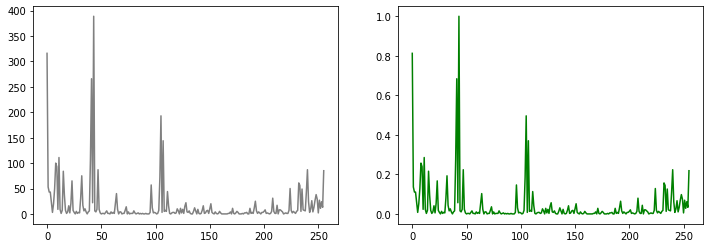

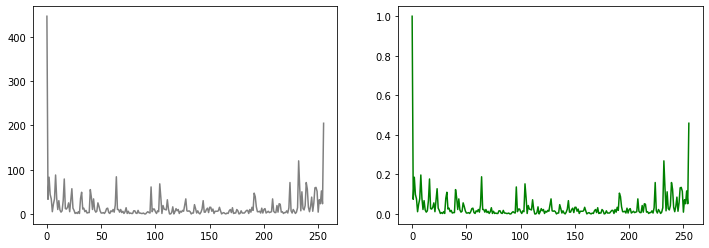

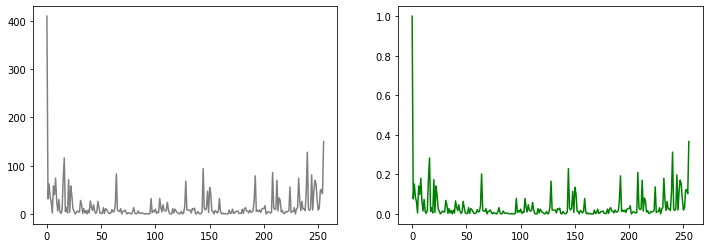

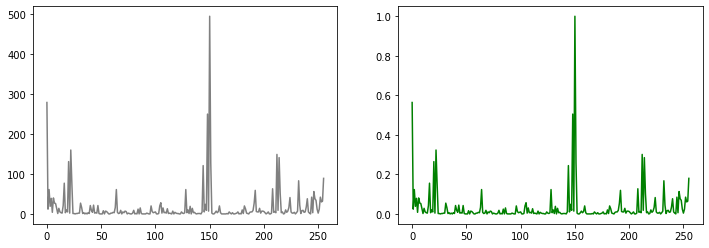

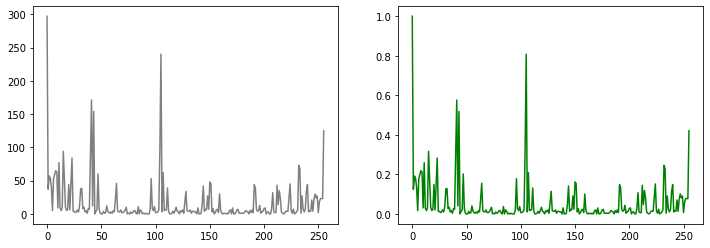

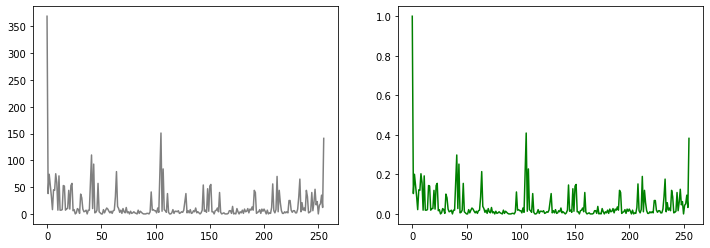

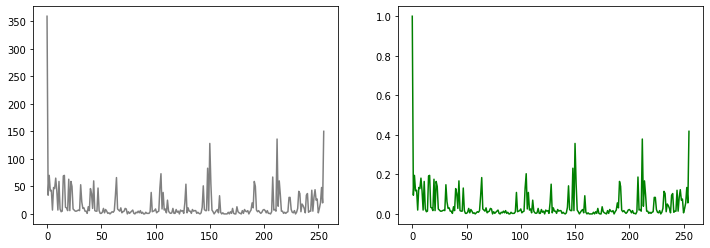

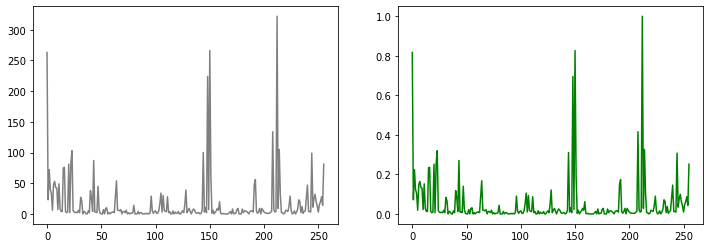

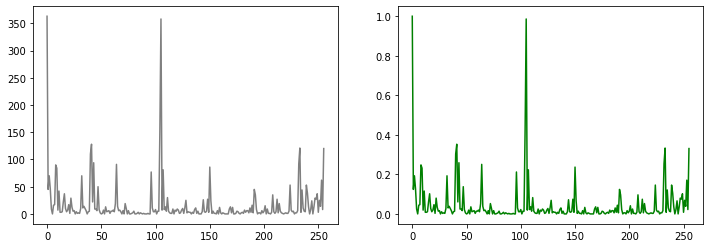

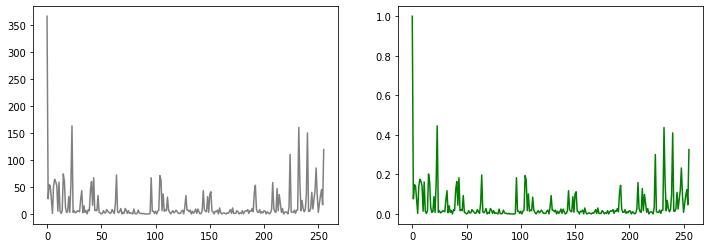

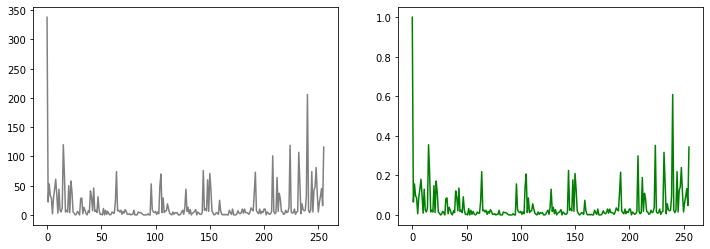

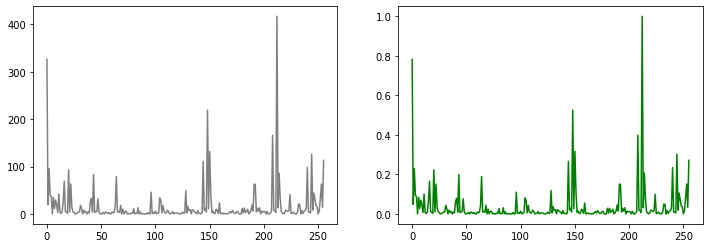

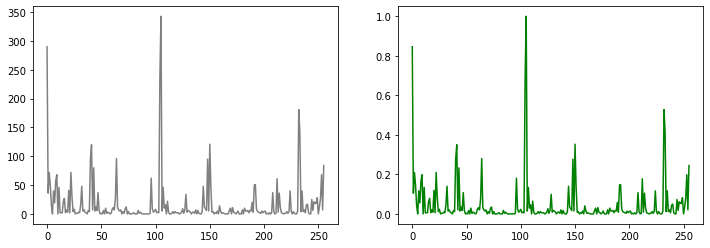

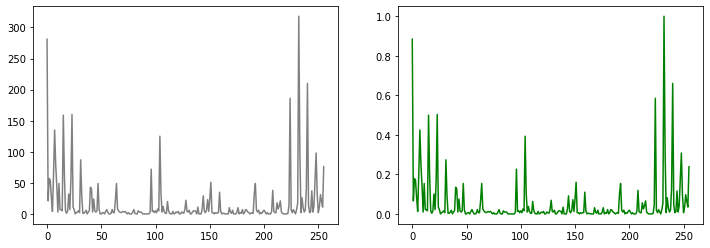

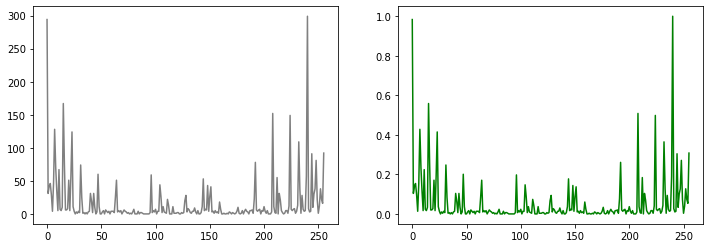

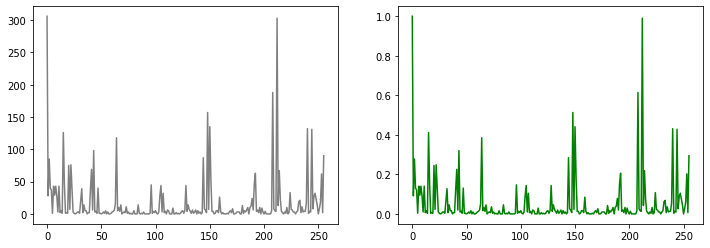

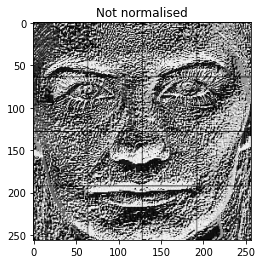

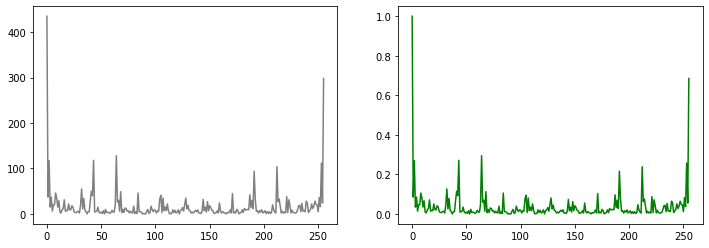

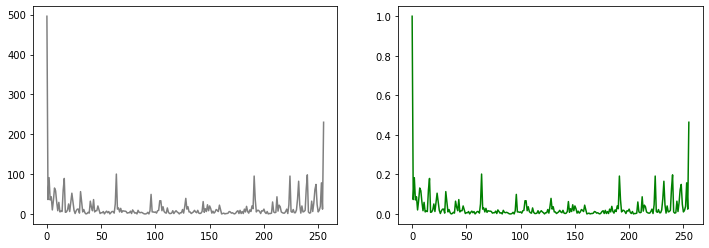

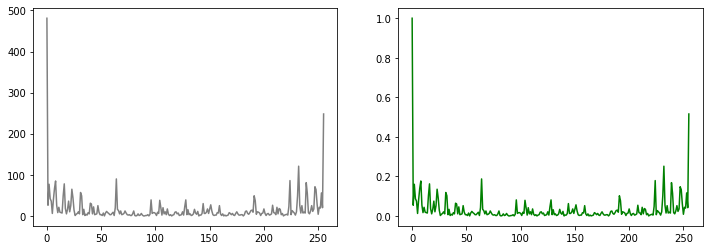

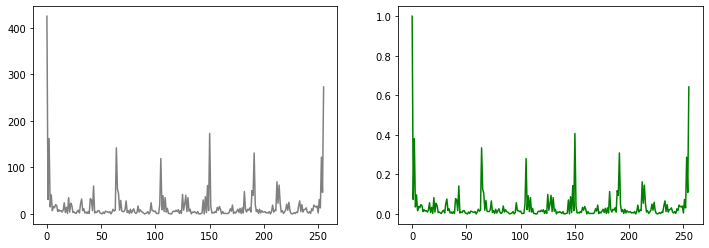

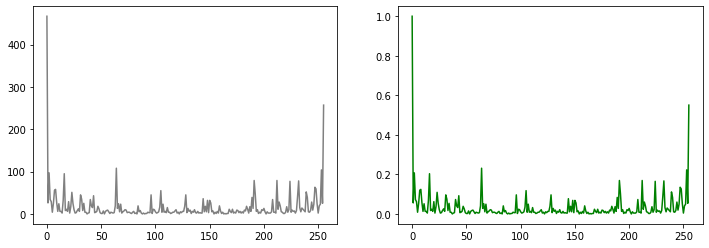

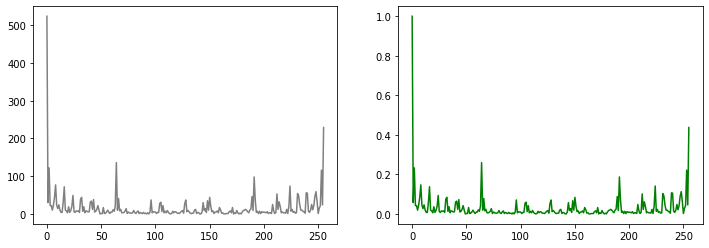

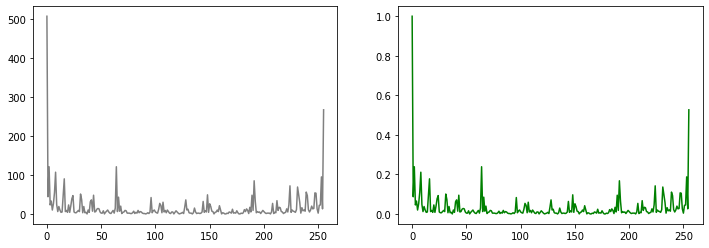

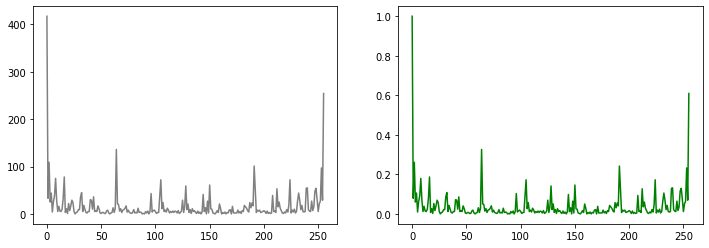

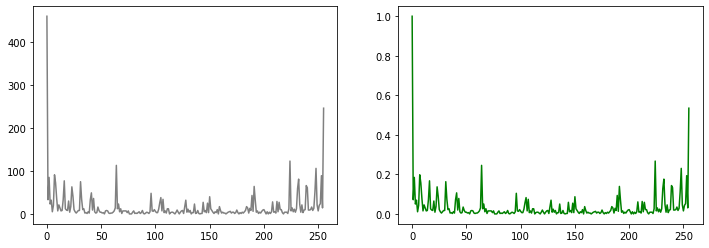

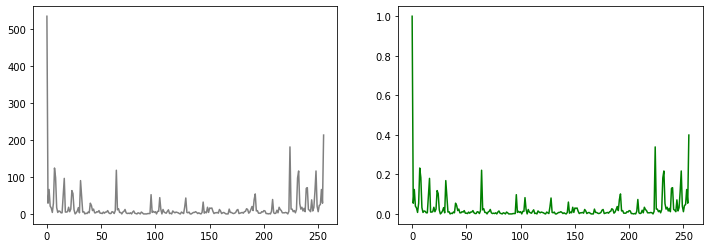

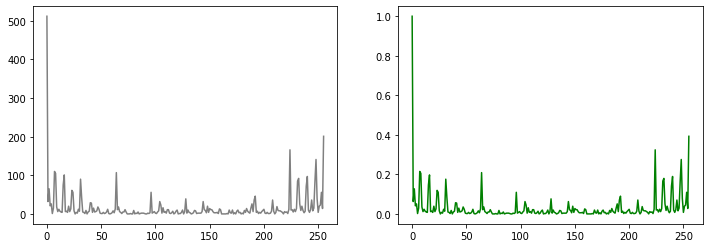

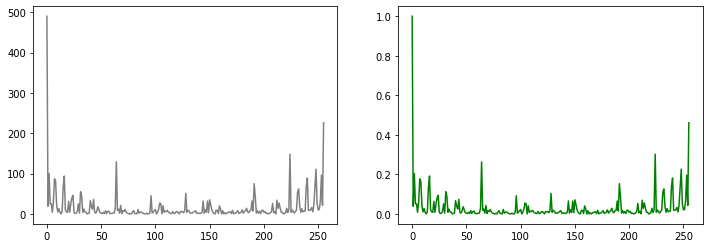

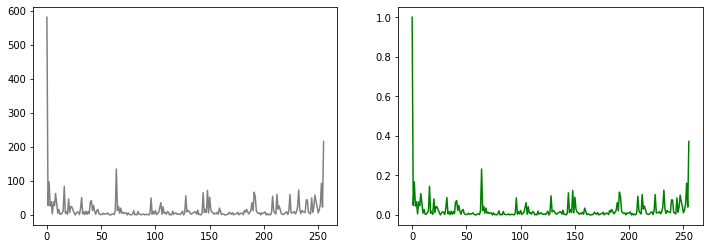

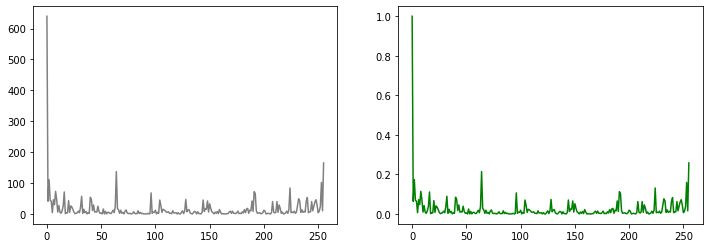

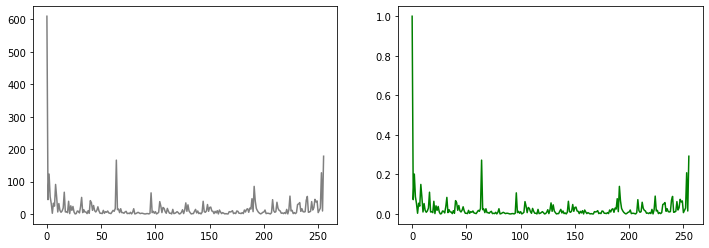

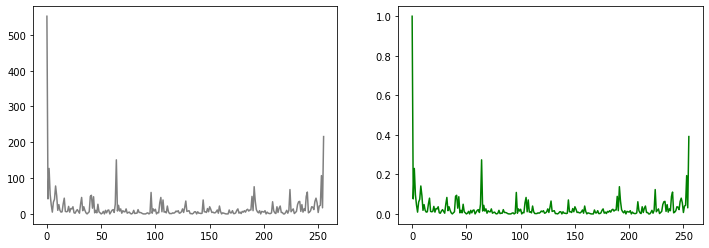

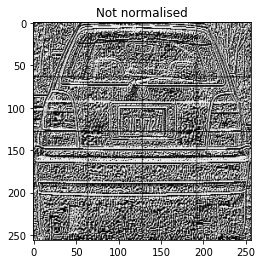

In [136]:
window_size = 64
face1_concatinated_histograms = LBP(face1_image,window_size)
car1_concatinated_histograms = LBP(car1_image,window_size) 
face2_concatinated_histograms = LBP(face2_image,window_size)
car2_concatinated_histograms = LBP(car2_image,window_size) 

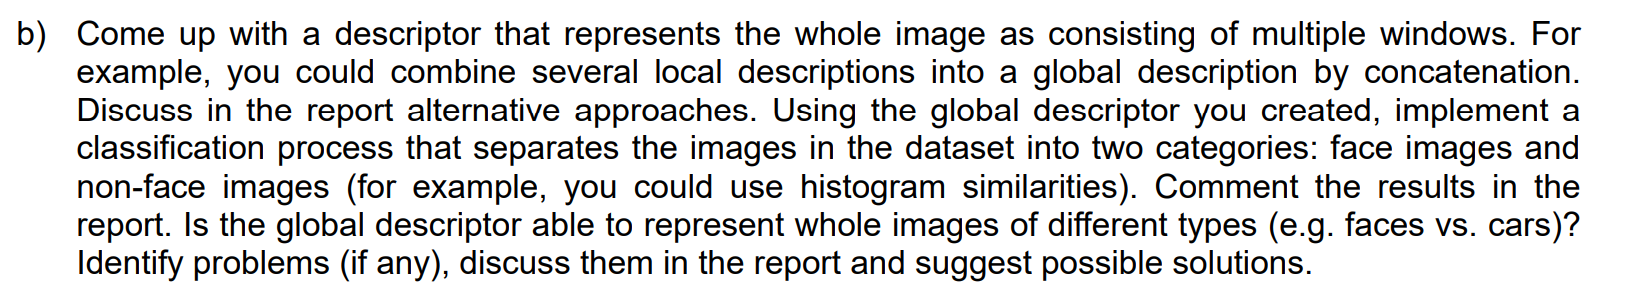


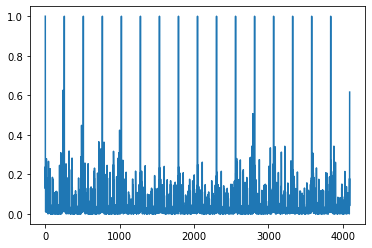

In [137]:
face1_points = np.concatenate(face1_concatinated_histograms, axis=0)
plt.plot(face1_points)

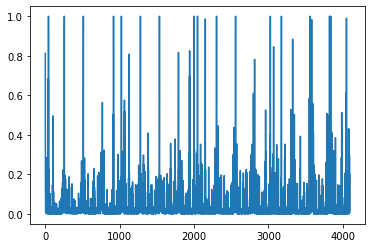

In [138]:
face2_points = np.concatenate(face2_concatinated_histograms, axis=0)
plt.plot(face2_points)

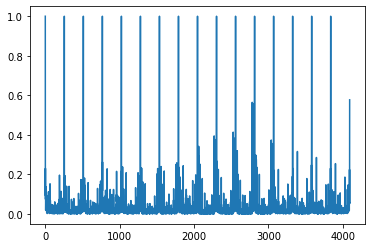

In [139]:
car1_points = np.concatenate(car1_concatinated_histograms, axis=0)
plt.plot(car1_points)

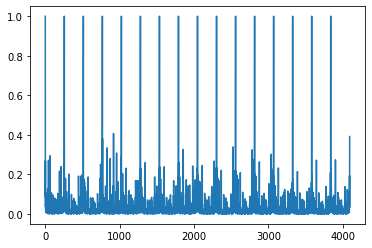

In [140]:
car2_points = np.concatenate(car2_concatinated_histograms, axis=0)
plt.plot(car2_points)

In [141]:
def euclidean_distance(hist1, hist2):
    # Ensure the histograms have the same length
    assert len(hist1) == len(hist2), "Histograms must have the same length"

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((hist1 - hist2)**2))
    
    return distance


In [142]:
euclidean_distance(face1_points, face2_points)

4.268168847852093

In [143]:
euclidean_distance(face1_points, car1_points)

3.236690974877445

In [144]:
euclidean_distance(face1_points, car2_points)

2.9432426183073255

In [145]:
euclidean_distance(car1_points, car2_points)

1.6699275559679934

In [146]:
euclidean_distance(face2_points, car2_points)

4.790148569536871

In [147]:
euclidean_distance(face2_points, car1_points)

5.291679521151825